# Part 1

In [234]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# First choice: dataset 1

In [235]:
df1 = pd.read_csv('/content/Metabolic  Syndrome.csv')
df1.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [236]:
df1.columns

Index(['seqn', 'Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

The target of this dataset is  'MetabolicSyndrome' column

In [237]:
df1.shape

(2401, 15)

In [238]:
df1.dtypes

seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

In [239]:
df1.isnull().sum()

seqn                   0
Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

## 1.Data Source

[Metabolic Syndrome Prediction - dataset by informatics-edu](https://)
The dataset come from NHANES National Health and Nutrition Examination Survey) , created 5 years ago by  
@rhoyt (Robert Hoyt: Author and Editor of Health Informatic)


## 2. Data Description

The Metabolic Syndrome Prediction Data set was combined from multiple tables with SQL: abnormal waist circumference, triglycerides above 150, HDL cholesterol below 50 in women or 40 in men, history of hypertension and mildly elevated fasting blood sugar (100-125). uric acid, race, income were added that might contribute the model.

## 3. What Does a row represent?

In [240]:
df1.head(3)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn


A row represents a person with informations about him such as: Sex, Marital Status, Income, Race ...

## 4. Classification / Regression Problem

In [241]:
df1['MetabolicSyndrome'].value_counts()

MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: count, dtype: int64

It is about a classification problem as we have to predict a class  (No MetSyn, MetSyn) which is a categorical variable.  

## 5.  How many features does the data have?

In [242]:
df1.shape

(2401, 15)

The Data Have 15 Features

## 6.How many rows are in the dataset?

In [243]:
df1.shape

(2401, 15)

The Dataset have 2401 rows.

## 7. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

In [244]:
df1.head(10)

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn
5,62178,80,Male,Widowed,300.0,White,112.5,28.5,0,9.79,4.8,105,47,100,No MetSyn
6,62184,26,Male,Single,9000.0,Black,78.6,22.1,0,9.21,5.4,87,61,40,No MetSyn
7,62189,30,Female,Married,6200.0,Asian,80.2,22.4,0,8.78,6.7,83,48,91,No MetSyn
8,62191,70,Male,Divorced,1000.0,Black,NaN,NaN,1,45.67,5.4,96,35,75,No MetSyn
9,62195,35,Male,NaN,2500.0,Black,99.0,28.2,0,2.21,6.7,94,46,86,No MetSyn


Cleaning Data: Missing Values

# Second choice: dataset 2

In [245]:
df2 = pd.read_csv('/content/Mall_Customers[1].csv')
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 1. Source

[https://www.kaggle.com/datasets/shwetabh123/mall-customers](https://)
 The Source of our Dataset is Kaggle

## 2. Data Description

The Dataset is downloaded from Kaggle, it has no description but is about Mall customers data. The target Column is the spending score of customers so we have to predict this value by modeling.

## 3. The Target

In [246]:
df2.head(5)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [247]:
df2.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [248]:
Y= df2['Spending Score (1-100)']

The target is 'Spending Score (1-100)' column.

## 4. What does one row represent?

A row represent a person with information: sex, age, income ...

## 5. Classification / Regression Problem:

It is about a regression problem as the model has to predict a score (numeric variable)

## 6. How many features does the data have?

In [249]:
df2.shape

(200, 5)

The data has 5 features

## 7. How many rows are in the dataset?

The Data 200 rows

## 8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

The challenge with this dataset is the volume. The number of rows and features which can be not enough for modeling.

# Part 2

### Deleted unnecessary columns.

In [250]:
df1.head()

,seqn,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,62161,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,62164,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,62169,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,62172,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,62177,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [251]:
df1=df1.drop(columns='seqn')

In [252]:
df1.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [253]:
df2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [254]:
df2=df2.drop(columns='CustomerID')

In [255]:
df2.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


### Deleted duplicate rows.

In [256]:
df1.duplicated().sum()

0

In [257]:
df2.duplicated().sum()

0

### Identified and addressed missing values.

In [258]:
df1.isnull().sum()

Age                    0
Sex                    0
Marital              208
Income               117
Race                   0
WaistCirc             85
BMI                   26
Albuminuria            0
UrAlbCr                0
UricAcid               0
BloodGlucose           0
HDL                    0
Triglycerides          0
MetabolicSyndrome      0
dtype: int64

In [259]:
df1.shape

(2401, 14)

In [260]:
df1.dtypes

Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

In [261]:
X=df1.drop(columns='MetabolicSyndrome')
Y=df1['MetabolicSyndrome']

In [262]:
trainx, testx, trainy, testy =train_test_split(X,Y, random_state=42)

In [263]:
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
impute_frequent = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [264]:
numeric_cols = trainx.select_dtypes("number").columns
categorical_cols = trainx.select_dtypes("object").columns

In [265]:
impute_mean.fit(trainx[numeric_cols])

SimpleImputer()

In [266]:
trainx_imputed = impute_mean.transform(trainx[numeric_cols])

In [267]:
impute_frequent.fit(trainx[categorical_cols])

SimpleImputer(strategy='most_frequent')

In [268]:
trainx_imputed=impute_frequent.transform(trainx[categorical_cols])

In [269]:
testx_imputed=impute_mean.transform(testx[numeric_cols])
testx_imputed=impute_frequent.transform(testx[categorical_cols])

In [270]:
df2.isnull().sum()

Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [271]:
df2.shape

(200, 4)

### Identified and corrected inconsistencies in data for categorical values

In [272]:
df1.dtypes

Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
WaistCirc            float64
BMI                  float64
Albuminuria            int64
UrAlbCr              float64
UricAcid             float64
BloodGlucose           int64
HDL                    int64
Triglycerides          int64
MetabolicSyndrome     object
dtype: object

In [273]:
df1['Sex'].value_counts()

Sex
Female    1211
Male      1190
Name: count, dtype: int64

In [274]:
df1['Marital'].value_counts()

Marital
Married      1192
Single        498
Divorced      242
Widowed       166
Separated      95
Name: count, dtype: int64

In [275]:
df1['Race'].value_counts()

Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: count, dtype: int64

In [276]:
df1['MetabolicSyndrome'].value_counts()

MetabolicSyndrome
No MetSyn    1579
MetSyn        822
Name: count, dtype: int64

In [277]:
df2.dtypes

Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [278]:
df2['Genre'].value_counts()

Genre
Female    112
Male       88
Name: count, dtype: int64

## Univariate Visuals

In [279]:
df1.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [280]:
Meta = df1[df1['MetabolicSyndrome'] == 'MetSyn']
NoMeta = df1[df1['MetabolicSyndrome'] == 'No MetSyn']

Text(0, 0.5, 'Metabolic Syndrome')

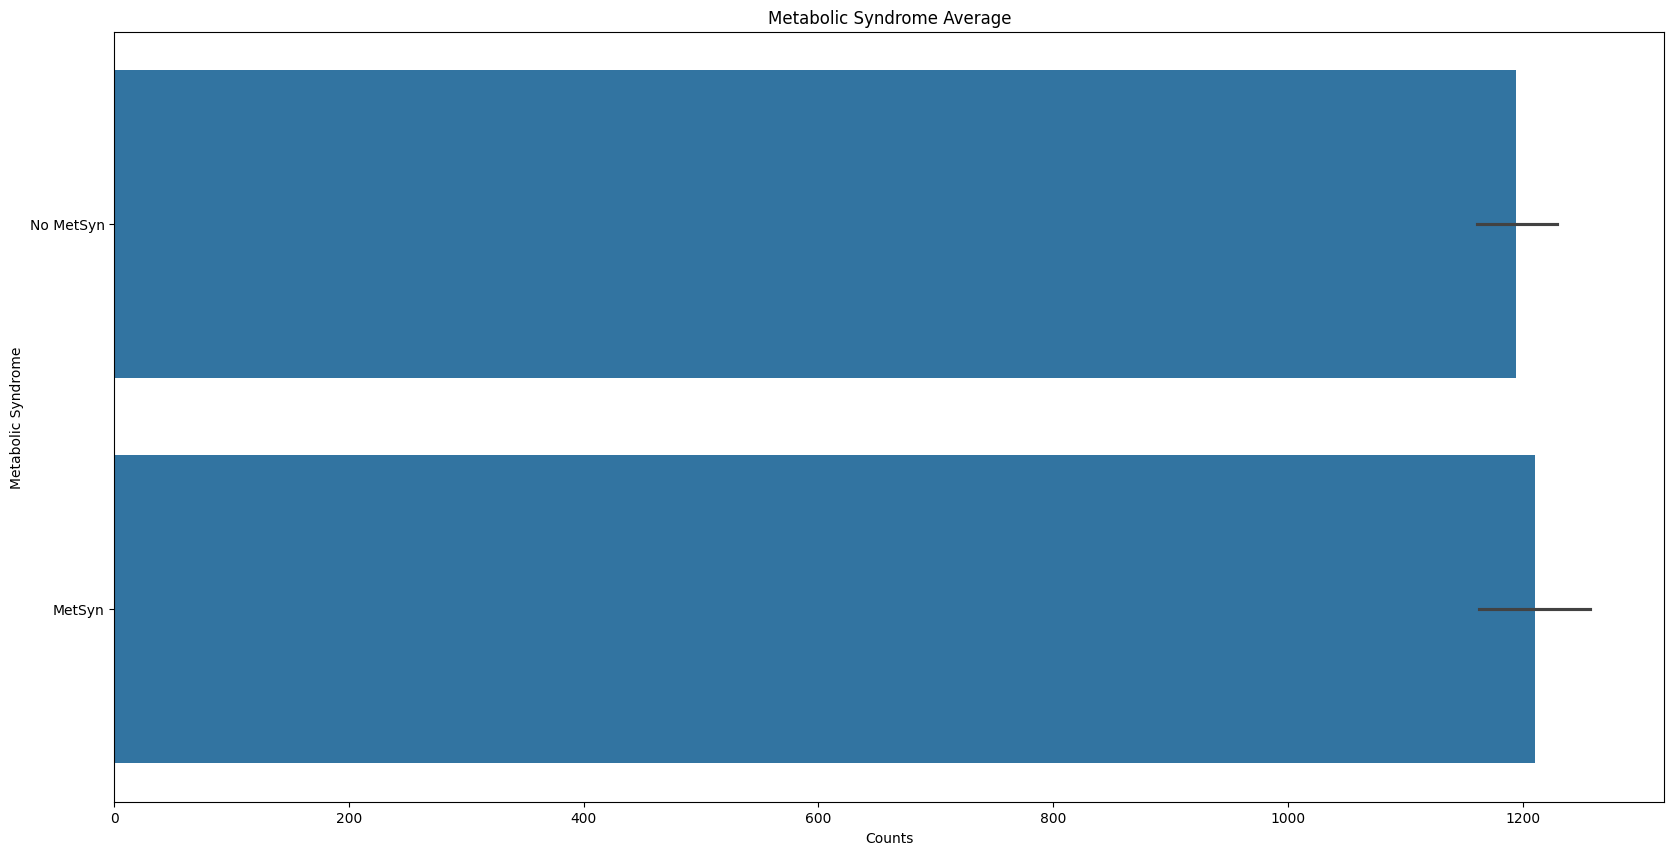

In [281]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=df1['MetabolicSyndrome'])
ax.set_title('Metabolic Syndrome Average')
ax.set_xlabel('Counts')
ax.set_ylabel('Metabolic Syndrome')

Text(0.5, 0, 'Metabolic Syndrom')

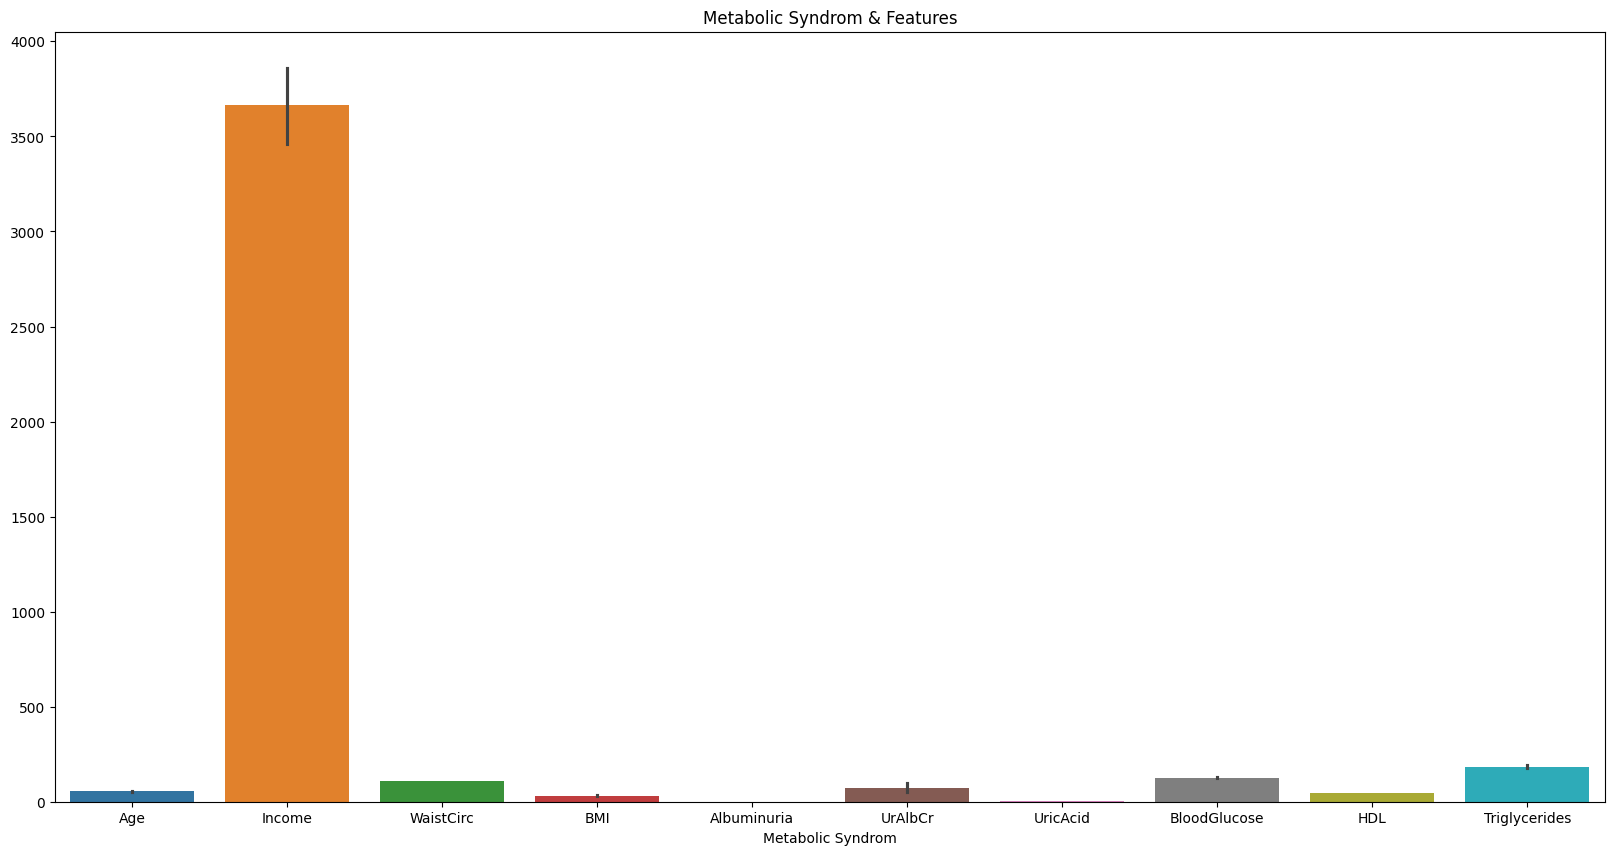

In [282]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=Meta )
ax.set_title('Metabolic Syndrom & Features')
ax.set_xlabel('Metabolic Syndrom')

Text(0.5, 0, 'No Metabolic Syndrom')

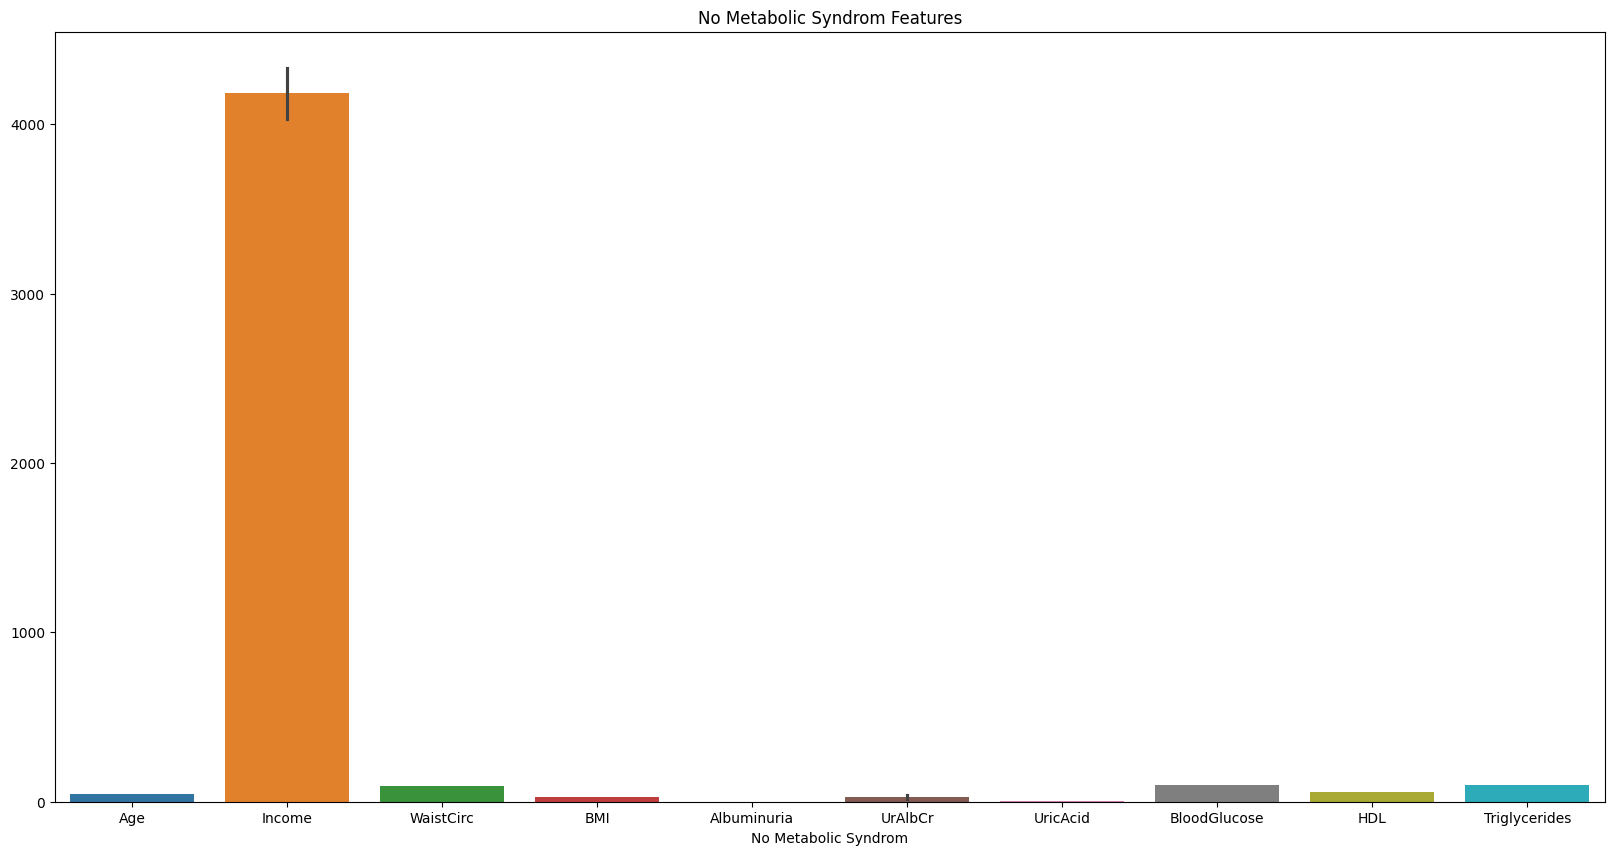

In [283]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=NoMeta )
ax.set_title('No Metabolic Syndrom Features')
ax.set_xlabel('No Metabolic Syndrom')

In [284]:
df2.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Visuals of df2

In [285]:
df2_sex = df2.groupby('Genre')['Spending Score (1-100)'].mean()
df2_sex = pd.DataFrame(df2_sex)

Text(0.5, 1.0, 'Spending Score Features')

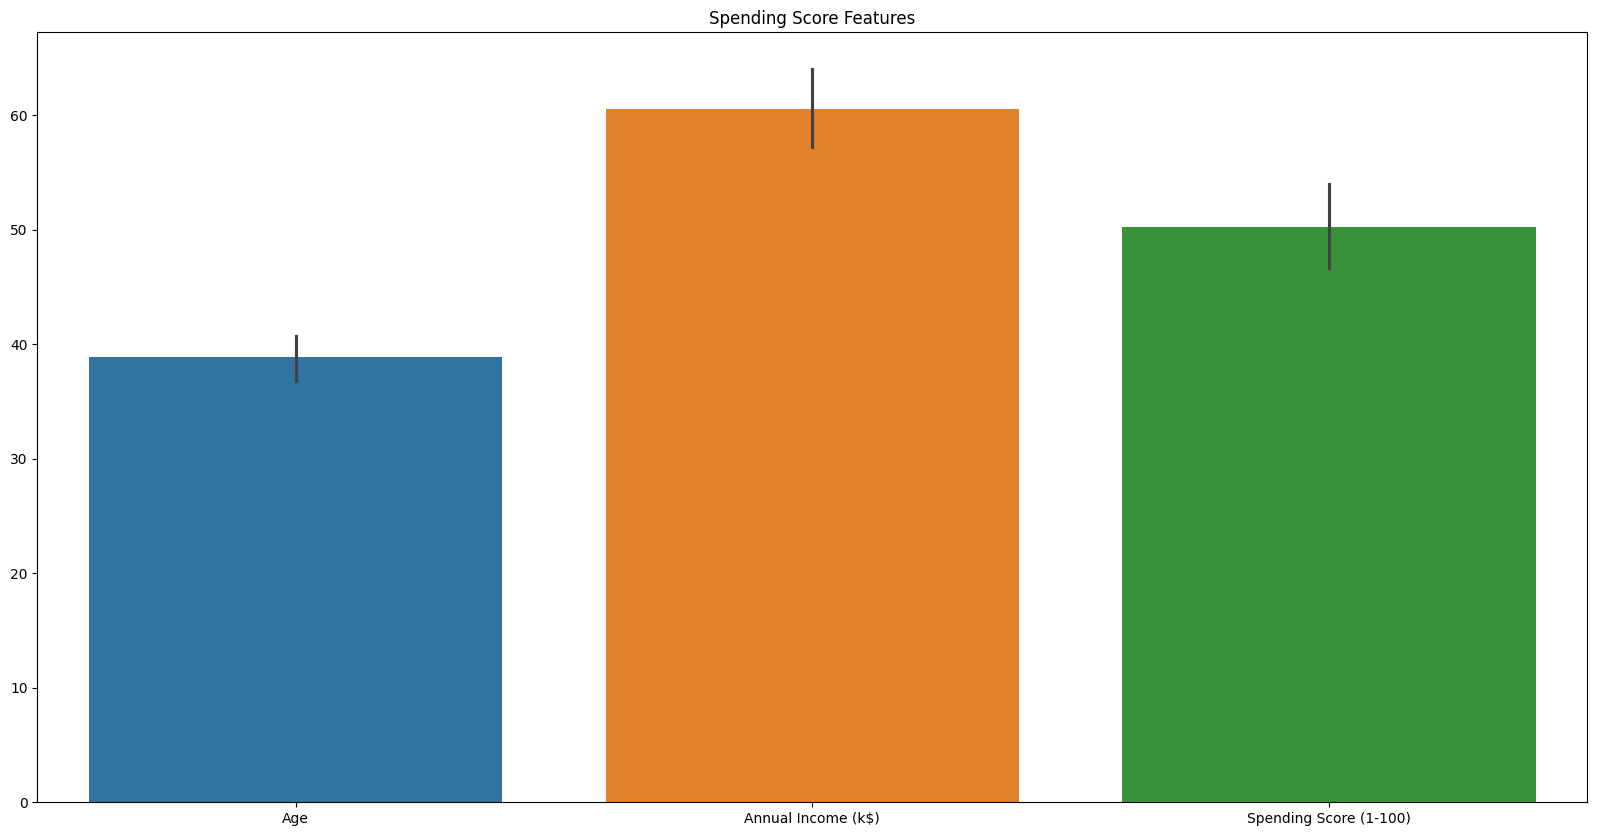

In [286]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=df2)
ax.set_title('Spending Score Features')

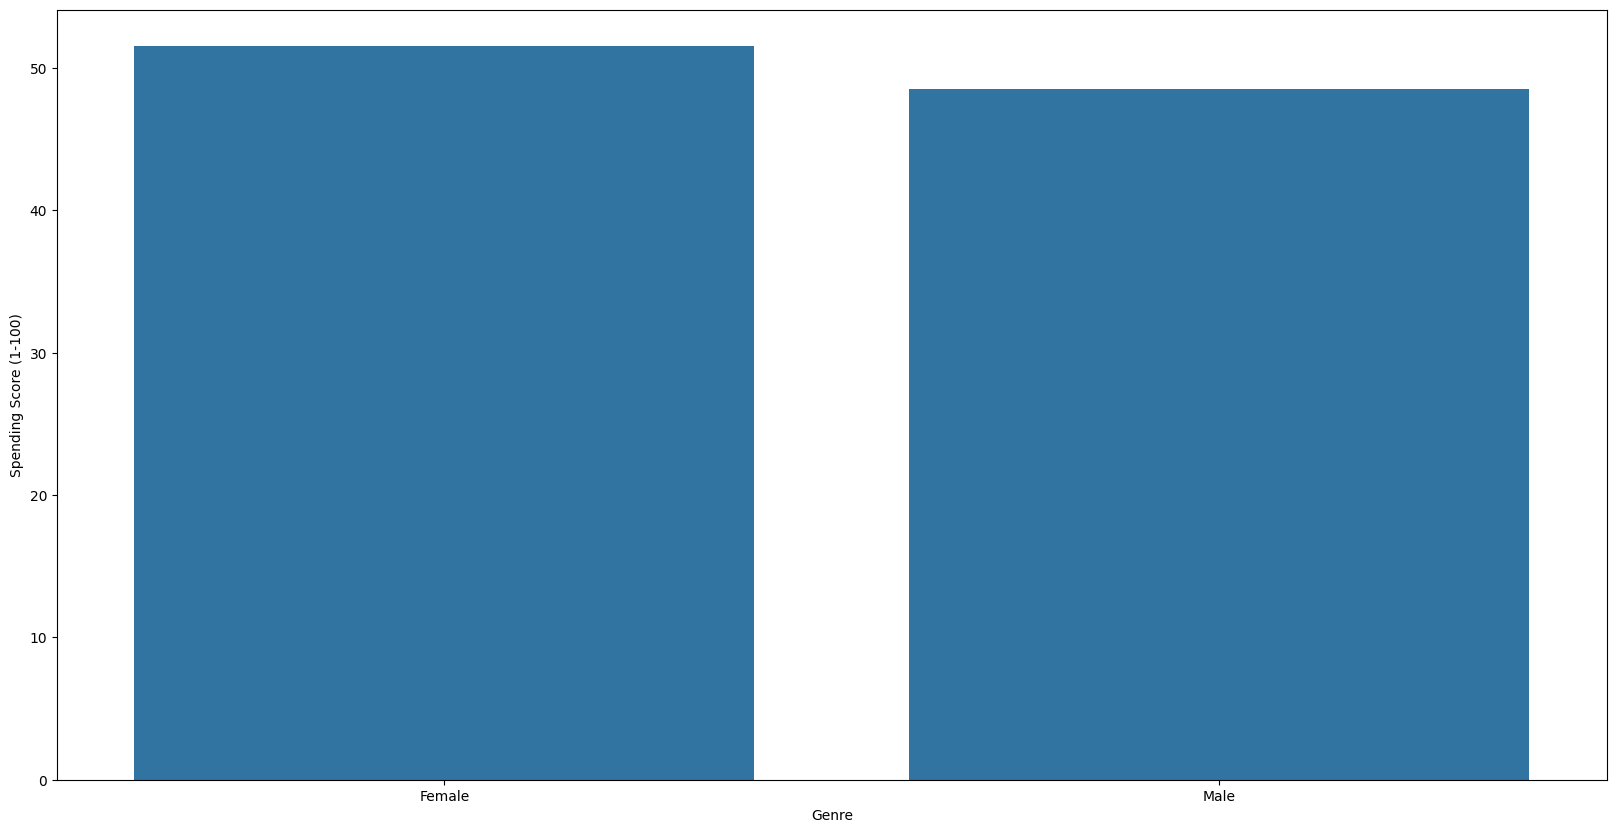

In [287]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=df2, x='Genre', y = 'Spending Score (1-100)', order = df2_sex.index, errorbar=None)

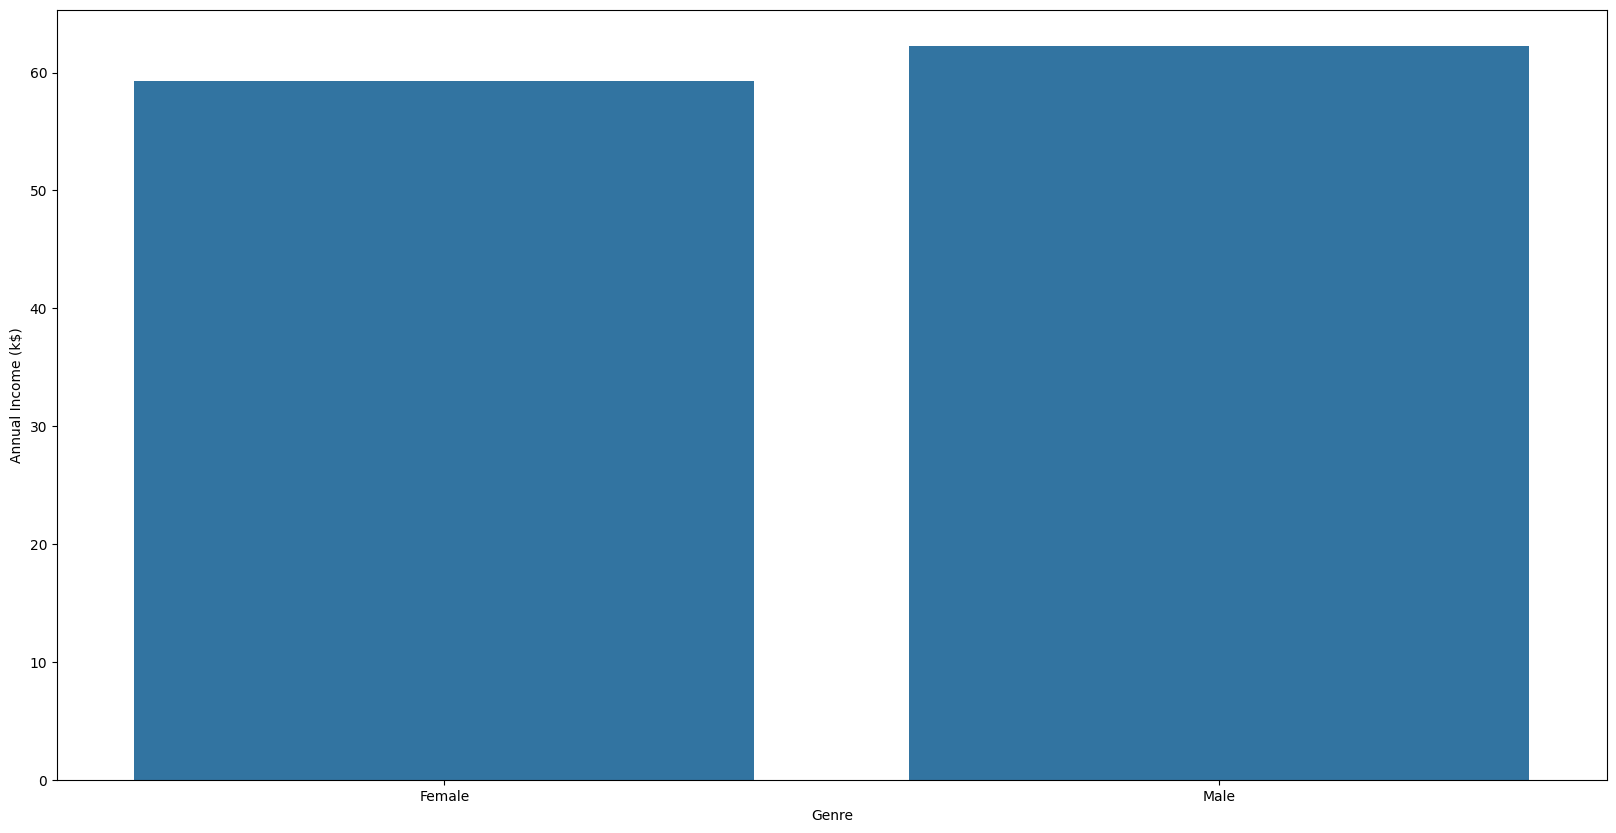

In [288]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(data=df2, x='Genre', y = 'Annual Income (k$)', order = df2_sex.index, errorbar=None)

## Outliers

### DF1

In [289]:
df1.head()

,Age,Sex,Marital,Income,Race,WaistCirc,BMI,Albuminuria,UrAlbCr,UricAcid,BloodGlucose,HDL,Triglycerides,MetabolicSyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,0,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,0,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,0,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,0,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,0,8.13,5.0,95,43,126,No MetSyn


In [290]:
df1['Age'].max()

80

In [291]:
df1['Age'].min()

20

In [292]:
df1['Income'].max()

9000.0

In [293]:
df1['Income'].min()

300.0

In [294]:
df1['WaistCirc'].min()

56.2

In [295]:
df1['WaistCirc'].max()

176.0

In [296]:
df1.columns

Index(['Age', 'Sex', 'Marital', 'Income', 'Race', 'WaistCirc', 'BMI',
       'Albuminuria', 'UrAlbCr', 'UricAcid', 'BloodGlucose', 'HDL',
       'Triglycerides', 'MetabolicSyndrome'],
      dtype='object')

In [297]:
df1['BMI'].max()

68.7

In [298]:
df1['BMI'].min()

13.4

In [299]:
df1['UrAlbCr'].max()

5928.0

In [300]:
df1['UrAlbCr'].min()

1.4

In [301]:
df1['UrAlbCr'].mean()

43.626130778842146

In [304]:
df1[ 'UricAcid'].max()

11.3

In [305]:
df1['UricAcid'].min()

1.8

In [306]:
df1['BloodGlucose'].max()

382

In [307]:
df1['BloodGlucose'].min()

39

In [308]:
df1['HDL'].max()

156

In [309]:
df1['HDL'].min()

14

In [310]:
df1['Triglycerides'].max()

1562

In [311]:
df1['Triglycerides'].min()

26

### DF2

In [317]:
df2.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [318]:
df2.columns

Index(['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [319]:
df2['Spending Score (1-100)'].max()

99

In [320]:
df2['Spending Score (1-100)'].min()

1

In [321]:
df2['Annual Income (k$)'].max()

137

In [322]:
df2['Annual Income (k$)'].min()

15

In [323]:
df2['Age'].max()

70

In [324]:
df2['Age'].min()

18